## Loan Default Prediction

SuperLender is a local digital lending company, which prides itself in its effective use of credit risk models to deliver profitable and high-impact loan alternative. Its assessment approach is based on two main risk drivers of loan default prediction:. 1) willingness to pay and 2) ability to pay. Since not all customers pay back, the company invests in experienced data scientist to build robust models to effectively predict the odds of repayment.

These two fundamental drivers need to be determined at the point of each application to allow the credit grantor to make a calculated decision based on repayment odds, which in turn determines if an applicant should get a loan, and if so - what the size, price and tenure of the offer will be.

There are two types of risk models in general: New business risk, which would be used to assess the risk of application(s) associated with the first loan that he/she applies. The second is a repeat or behaviour risk model, in which case the customer has been a client and applies for a repeat loan. In the latter case - we will have additional performance on how he/she repaid their prior loans, which we can incorporate into our risk model.

Given the above I want to predict if a loan was good or bad, i.e. accurately predict binary outcome variable, where Good is 1 and Bad is 0.

In [55]:
#### importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
warnings.filterwarnings("ignore")


ModuleNotFoundError: No module named 'geopandas'

In [ ]:
##### Reading in the data
demos= pd.read_csv('LoanPredict/traindemographics.csv')
perf = pd.read_csv('LoanPredict/trainperf.csv')
prevloans = pd.read_csv('LoanPredict/trainprevloans.csv')


In [15]:
# checking data structure
demos = pd.DataFrame(demos)
demos.head(10)

customerid                   birthdate  \
0  8a858e135cb22031015cbafc76964ebd  1973-10-10 00:00:00.000000   
1  8a858e275c7ea5ec015c82482d7c3996  1986-01-21 00:00:00.000000   
2  8a858e5b5bd99460015bdc95cd485634  1987-04-01 00:00:00.000000   
3  8a858efd5ca70688015cabd1f1e94b55  1991-07-19 00:00:00.000000   
4  8a858e785acd3412015acd48f4920d04  1982-11-22 00:00:00.000000   
5  8a858f045bc9690c015bca251e9a4e95  1978-12-11 00:00:00.000000   
6  8a858ea05a859123015a8892914d15b7  1990-07-21 00:00:00.000000   
7  8a858f275c451af5015c546a50ce55ed  1986-09-09 00:00:00.000000   
8  8a858f405d13c45f015d13dd93ec0c1c  1992-11-17 00:00:00.000000   
9  8a858f735c161bda015c164d86632026  1965-02-23 00:00:00.000000   

  bank_account_type  longitude_gps  latitude_gps bank_name_clients  \
0           Savings       3.319219      6.528604           GT Bank   
1           Savings       3.325598      7.119403     Sterling Bank   
2           Savings       5.746100      5.563174     Fidelity Bank   
3           Savings       3.362850      6.642485           GT Bank   
4           Savings       8.455332     11.971410           GT Bank   
5           Savings       3.330087      6.552518           GT Bank   
6           Savings       3.365935      6.564823       Access Bank   
7           Savings       4.734382      7.606868           GT Bank   
8           Savings       3.290590      6.612075           EcoBank   
9           Savings       3.362783      6.509418           EcoBank   

  bank_branch_clients employment_status_clients level_of_education_clients  
0                 NaN                       NaN                        NaN  
1                 NaN                 Permanent                        NaN  
2                 NaN                       NaN                        NaN  
3                 NaN                 Permanent                        NaN  
4                 NaN                 Permanent                        NaN  
5                 NaN                 Permanent                        NaN  
6                 NaN                 Permanent                        NaN  
7                 NaN                 Permanent                        NaN  
8                 NaN                 Permanent                        NaN  
9                 NaN                 Permanent                        NaN

In [9]:
# checking data structure
perf = pd.DataFrame(perf)
perf.head()

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301994762          12   
1  8a85886e54beabf90154c0a29ae757c0     301965204           2   
2  8a8588f35438fe12015444567666018e     301966580           7   
3  8a85890754145ace015429211b513e16     301999343           3   
4  8a858970548359cc0154883481981866     301962360           9   

                 approveddate                creationdate  loanamount  \
0  2017-07-25 08:22:56.000000  2017-07-25 07:22:47.000000     30000.0   
1  2017-07-05 17:04:41.000000  2017-07-05 16:04:18.000000     15000.0   
2  2017-07-06 14:52:57.000000  2017-07-06 13:52:51.000000     20000.0   
3  2017-07-27 19:00:41.000000  2017-07-27 18:00:35.000000     10000.0   
4  2017-07-03 23:42:45.000000  2017-07-03 22:42:39.000000     40000.0   

   totaldue  termdays referredby good_bad_flag  
0   34500.0        30        NaN          Good  
1   17250.0        30        NaN          Good  
2   22250.0        15        NaN          Good  
3   11500.0        15        NaN          Good  
4   44000.0        30        NaN          Good

In [10]:
# checking data structure
prevloans = pd.DataFrame(prevloans)
prevloans.head()

customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301682320           2   
1  8a2a81a74ce8c05d014cfb32a0da1049     301883808           9   
2  8a2a81a74ce8c05d014cfb32a0da1049     301831714           8   
3  8a8588f35438fe12015444567666018e     301861541           5   
4  8a85890754145ace015429211b513e16     301941754           2   

                 approveddate                creationdate  loanamount  \
0  2016-08-15 18:22:40.000000  2016-08-15 17:22:32.000000     10000.0   
1  2017-04-28 18:39:07.000000  2017-04-28 17:38:53.000000     10000.0   
2  2017-03-05 10:56:25.000000  2017-03-05 09:56:19.000000     20000.0   
3  2017-04-09 18:25:55.000000  2017-04-09 17:25:42.000000     10000.0   
4  2017-06-17 09:29:57.000000  2017-06-17 08:29:50.000000     10000.0   

   totaldue  termdays                  closeddate referredby  \
0   13000.0        30  2016-09-01 16:06:48.000000        NaN   
1   13000.0        30  2017-05-28 14:44:49.000000        NaN   
2   23800.0        30  2017-04-26 22:18:56.000000        NaN   
3   11500.0        15  2017-04-24 01:35:52.000000        NaN   
4   11500.0        15  2017-07-14 21:18:43.000000        NaN   

                 firstduedate             firstrepaiddate  
0  2016-09-14 00:00:00.000000  2016-09-01 15:51:43.000000  
1  2017-05-30 00:00:00.000000  2017-05-26 00:00:00.000000  
2  2017-04-04 00:00:00.000000  2017-04-26 22:03:47.000000  
3  2017-04-24 00:00:00.000000  2017-04-24 00:48:43.000000  
4  2017-07-03 00:00:00.000000  2017-07-14 21:08:35.000000

##### Understanding the data and its structure

In [14]:
demos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
customerid                    4346 non-null object
birthdate                     4346 non-null object
bank_account_type             4346 non-null object
longitude_gps                 4346 non-null float64
latitude_gps                  4346 non-null float64
bank_name_clients             4346 non-null object
bank_branch_clients           51 non-null object
employment_status_clients     3698 non-null object
level_of_education_clients    587 non-null object
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


In [16]:
perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
customerid       4368 non-null object
systemloanid     4368 non-null int64
loannumber       4368 non-null int64
approveddate     4368 non-null object
creationdate     4368 non-null object
loanamount       4368 non-null float64
totaldue         4368 non-null float64
termdays         4368 non-null int64
referredby       587 non-null object
good_bad_flag    4368 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 341.3+ KB


In [17]:
prevloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
customerid         18183 non-null object
systemloanid       18183 non-null int64
loannumber         18183 non-null int64
approveddate       18183 non-null object
creationdate       18183 non-null object
loanamount         18183 non-null float64
totaldue           18183 non-null float64
termdays           18183 non-null int64
closeddate         18183 non-null object
referredby         1026 non-null object
firstduedate       18183 non-null object
firstrepaiddate    18183 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [22]:
perf.describe()

systemloanid   loannumber    loanamount      totaldue     termdays
count  4.368000e+03  4368.000000   4368.000000   4368.000000  4368.000000
mean   3.019810e+08     5.172390  17809.065934  21257.377679    29.261676
std    1.343115e+04     3.653569  10749.694571  11943.510416    11.512519
min    3.019585e+08     2.000000  10000.000000  10000.000000    15.000000
25%    3.019691e+08     2.000000  10000.000000  13000.000000    30.000000
50%    3.019801e+08     4.000000  10000.000000  13000.000000    30.000000
75%    3.019935e+08     7.000000  20000.000000  24500.000000    30.000000
max    3.020040e+08    27.000000  60000.000000  68100.000000    90.000000

In [23]:
prevloans.describe()

systemloanid    loannumber    loanamount      totaldue      termdays
count  1.818300e+04  18183.000000  18183.000000  18183.000000  18183.000000
mean   3.018395e+08      4.189353  16501.237420  19573.202931     26.692790
std    9.367767e+04      3.249490   9320.547516  10454.245277     10.946556
min    3.016001e+08      1.000000   3000.000000   3450.000000     15.000000
25%    3.017766e+08      2.000000  10000.000000  11500.000000     15.000000
50%    3.018550e+08      3.000000  10000.000000  13000.000000     30.000000
75%    3.019197e+08      6.000000  20000.000000  24500.000000     30.000000
max    3.020003e+08     26.000000  60000.000000  68100.000000     90.000000

In [24]:
# check the sum of the null values for each feature
prevloans.isnull().sum()

customerid             0
systemloanid           0
loannumber             0
approveddate           0
creationdate           0
loanamount             0
totaldue               0
termdays               0
closeddate             0
referredby         17157
firstduedate           0
firstrepaiddate        0
dtype: int64

In [25]:
# check the sum of the null values for each feature
perf.isnull().sum()

customerid          0
systemloanid        0
loannumber          0
approveddate        0
creationdate        0
loanamount          0
totaldue            0
termdays            0
referredby       3781
good_bad_flag       0
dtype: int64

In [26]:
demos.isnull().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients      648
level_of_education_clients    3759
dtype: int64

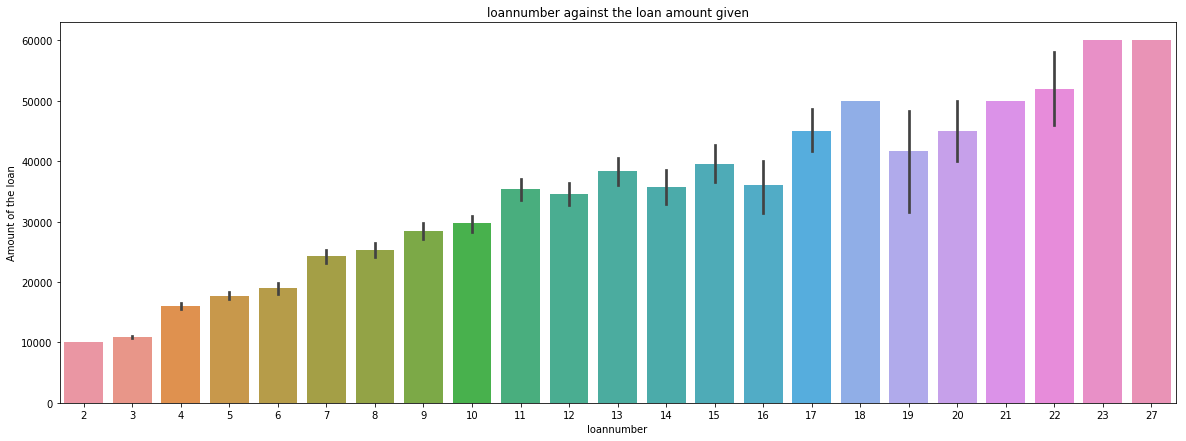

In [49]:
# demos = pd.DataFrame(demos['birthdate'].value_counts())
# demos.reset_index(inplace=True)
# demos.columns = [ 'birthdate']
# perf.columns = ['loanamount']

# demos=pd.DataFrame(demos)
# demos
# perf =pd.DataFrame(perf)
# perf
plt.figure(figsize=(20, 7))
barplot = sns.barplot( x = perf['loannumber'], y = perf['loanamount'])
barplot.set(xlabel='loannumber', ylabel='Amount of the loan')
plt.title("loannumber against the loan amount given")
plt.xlabel("loannumber")
plt.ylabel("Amount of the loan")
plt.show()

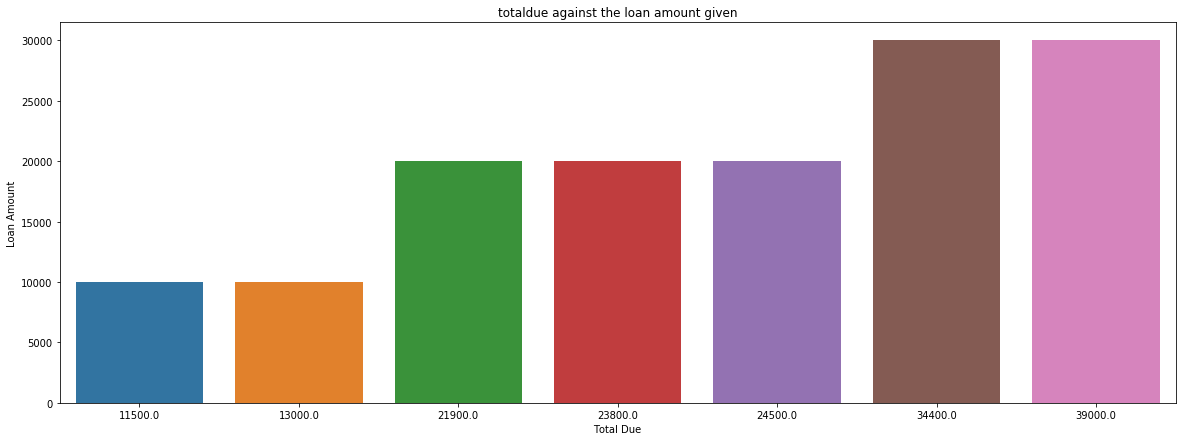

In [51]:
plt.figure(figsize=(20, 7))
barplot = sns.barplot( x = prevloans['totaldue'][:20], y = prevloans['loanamount'][:20])
barplot.set(xlabel='totaldue', ylabel='loanamount')
plt.title("totaldue against the loan amount given")
plt.xlabel("Total Due")
plt.ylabel("Loan Amount")
plt.show()

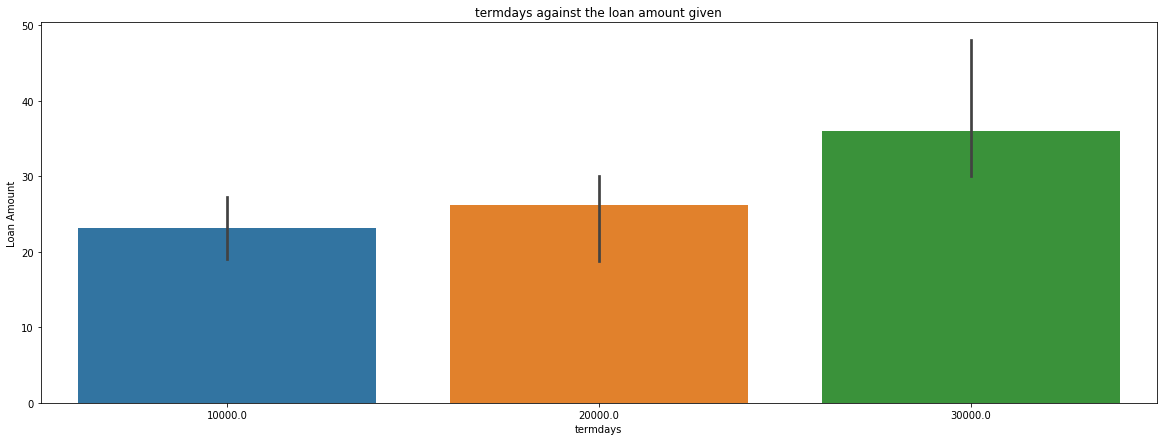

In [53]:
plt.figure(figsize=(20, 7))
barplot = sns.barplot( x = prevloans['loanamount'][:20], y = prevloans['termdays'][:20])
barplot.set(xlabel='termdays', ylabel='loanamount')
plt.title("termdays against the loan amount given")
plt.xlabel("termdays")
plt.ylabel("Loan Amount")

plt.show()